In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the dataset and convert 'Fecha' to datetime
data = pd.read_csv('../../DATA/rainfall/EPM_hourly/EPM_houry.csv')
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)

In [5]:
# Calculate average correlations for each hour
average_correlations_by_hour = []
std_devs_by_hour = []

# Loop through each hour of the day (0-23)
for hour in range(24):
    # Filter data for the specific hour
    hourly_data = data[data.index.hour == hour]
    
    # Drop columns where all values are NaN
    hourly_data_clean = hourly_data.dropna(axis=1, how='all')
    
    if hourly_data_clean.shape[1] > 1:  # Need at least two columns to compute correlation
        # Calculate Spearman correlation matrix
        correlation_matrix = hourly_data_clean.corr(method='spearman')
        
        # Extract the upper triangle of the correlation matrix without the diagonal
        upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
        
        # Calculate the mean and standard deviation of the non-NaN correlations in the upper triangle
        mean_correlation = upper_triangle.stack().mean()
        std_dev_correlation = upper_triangle.stack().std()
        
        # Append the results for this hour
        average_correlations_by_hour.append(mean_correlation)
        std_devs_by_hour.append(std_dev_correlation)
    else:
        average_correlations_by_hour.append(np.nan)
        std_devs_by_hour.append(np.nan)


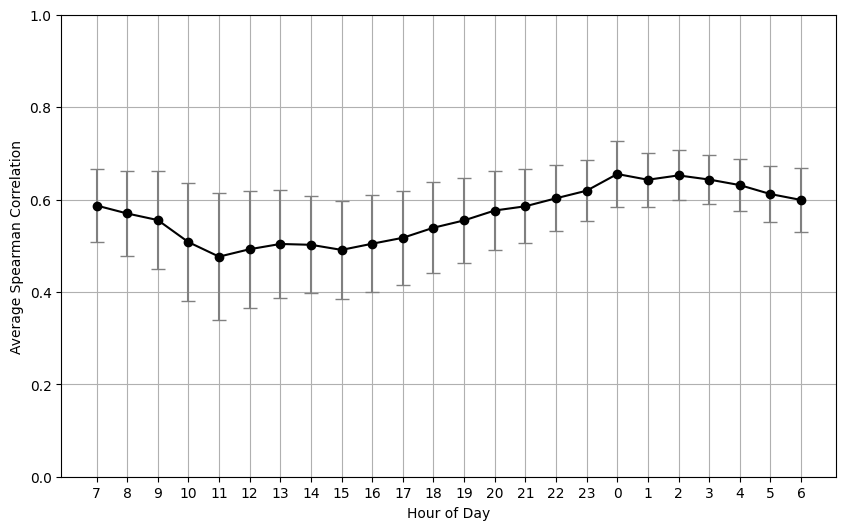

In [7]:
# Rearrange the data to start from 7 AM and end at 6 AM
shifted_correlations = average_correlations_by_hour[7:] + average_correlations_by_hour[:7]
shifted_std_devs = std_devs_by_hour[7:] + std_devs_by_hour[:7]

# Create corresponding x-axis labels to reflect the sequence from 7 AM to 6 AM
shifted_hours_labels = list(range(7, 24)) + list(range(0, 7))

# Plot the data with error bars representing the standard deviation
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(range(24), shifted_correlations, yerr=shifted_std_devs, fmt='o', linestyle='-', markersize=6, capsize=5, color='black', ecolor='gray')

# Set labels
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Spearman Correlation')

# Adjust x-axis labels on the bottom
ax.set_xticks(range(24))
ax.set_xticklabels(shifted_hours_labels)

# Set y-axis limits from 0 to 1
ax.set_ylim(0, 1)

# Add lines on the top and right sides to close the figure (without labels or ticks)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# Hide ticks and labels on top and right axes
ax.tick_params(top=False, right=False)

# Add gridlines
ax.grid(True)

# Save the figure as PNG
plt.savefig('../../FIGURES/spatial_analysis/spearman_correlation_by_hour.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

In [18]:
# Calculate the number of rows with values greater than 29 for each station
station_counts_greater_than = {}
value=10
# Loop through each station column
for station in data.columns:
    # Count the number of rows where values are greater than 29 for the station, ignoring NaNs
    count_greater_than = data[station].gt(value).sum()
    
    # Store the result in the dictionary
    station_counts_greater_than[station] = count_greater_than

# Convert the results to a DataFrame for easier viewing
station_greater_than_df = pd.DataFrame(list(station_counts_greater_than.items()), columns=['Station', 'Count'])

print(station_greater_than_df)


                Station  Count
0         P_Manantiales   1069
1          P_Chorrillos    648
2   P_San_Antonio_Prado    959
3       P_Villa_Hermosa    545
4       P_San_Cristobal    638
5               P_Ayura    723
6           P_Cucaracho    595
7          P_Astilleros    951
8         P_El_Convento    437
9            P_Pedregal    416
10             P_Gerona    469
11    P_Miguel_Aguinaga    479


In [19]:
# Calculate the number of rows with values between 1 and 10 for each station
station_counts_between = {}

# Loop through each station column
for station in data.columns:
    # Count the number of rows where values are between 1 and 10 (inclusive), ignoring NaNs
    count_between = data[station].between(1, 10).sum()
    
    # Store the result in the dictionary
    station_counts_between[station] = count_between

# Convert the results to a DataFrame for easier viewing
station_between_df = pd.DataFrame(list(station_counts_between.items()), columns=['Station', 'Count (1 <= Value <= 10)'])

print(station_between_df)


                Station  Count (1 <= Value <= 10)
0         P_Manantiales                     13883
1          P_Chorrillos                     27578
2   P_San_Antonio_Prado                     34539
3       P_Villa_Hermosa                     23312
4       P_San_Cristobal                     25988
5               P_Ayura                     20099
6           P_Cucaracho                      9992
7          P_Astilleros                     12854
8         P_El_Convento                      9855
9            P_Pedregal                      8149
10             P_Gerona                      8451
11    P_Miguel_Aguinaga                     18095


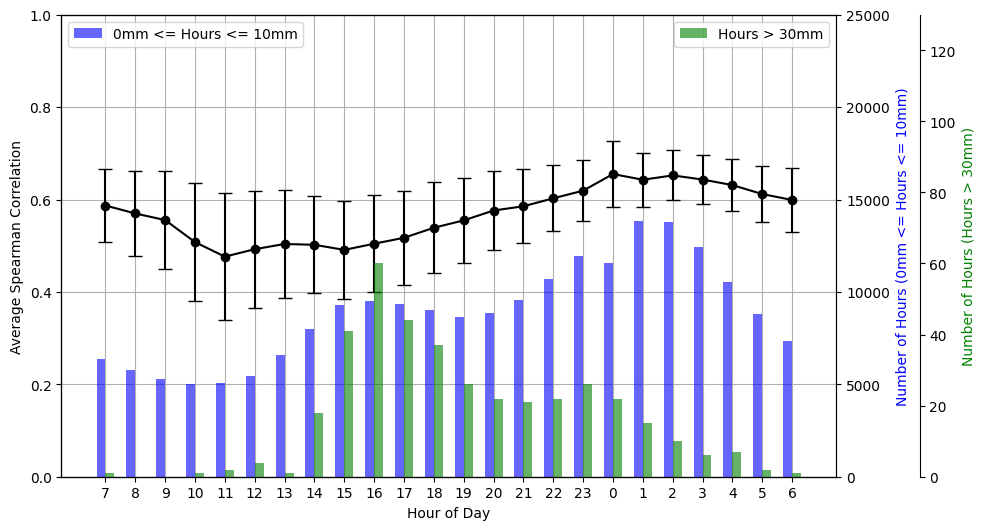

In [28]:
# Calculate average correlations for each hour
average_correlations_by_hour = []
std_devs_by_hour = []
rows_greater_than_30_by_hour = []
rows_between_1_and_10_by_hour = []

# Loop through each hour of the day (0-23)
for hour in range(24):
    # Filter data for the specific hour
    hourly_data = data[data.index.hour == hour]
    
    # Drop columns where all values are NaN
    hourly_data_clean = hourly_data.dropna(axis=1, how='all')
    
    if hourly_data_clean.shape[1] > 1:  # Need at least two columns to compute correlation
        # Calculate Spearman correlation matrix
        correlation_matrix = hourly_data_clean.corr(method='spearman')
        
        # Extract the upper triangle of the correlation matrix without the diagonal
        upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
        
        # Calculate the mean and standard deviation of the non-NaN correlations in the upper triangle
        mean_correlation = upper_triangle.stack().mean()
        std_dev_correlation = upper_triangle.stack().std()
        
        # Append the results for this hour
        average_correlations_by_hour.append(mean_correlation)
        std_devs_by_hour.append(std_dev_correlation)
    else:
        average_correlations_by_hour.append(np.nan)
        std_devs_by_hour.append(np.nan)
    
    # Count rows where any station has values greater than 30
    rows_greater_than_30 = (hourly_data_clean > 30).sum().sum()
    rows_greater_than_30_by_hour.append(rows_greater_than_30)

    # Count rows where values are between 1 and 10 (inclusive)
    rows_between_1_and_10 = hourly_data_clean.apply(lambda x: x.between(1, 10)).sum().sum()
    rows_between_1_and_10_by_hour.append(rows_between_1_and_10)

# Rearrange the data to start from 7 AM and end at 6 AM
shifted_correlations = average_correlations_by_hour[7:] + average_correlations_by_hour[:7]
shifted_std_devs = std_devs_by_hour[7:] + std_devs_by_hour[:7]
shifted_rows_greater_than_30 = rows_greater_than_30_by_hour[7:] + rows_greater_than_30_by_hour[:7]
shifted_rows_between_1_and_10 = rows_between_1_and_10_by_hour[7:] + rows_between_1_and_10_by_hour[:7]

# Create corresponding x-axis labels to reflect the sequence from 7 AM to 6 AM
shifted_hours_labels = list(range(7, 24)) + list(range(0, 7))

# Plot the data with error bars representing the standard deviation
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line plot for Spearman correlations
ax1.errorbar(range(24), shifted_correlations, yerr=shifted_std_devs, fmt='o', linestyle='-', markersize=6, capsize=5, color='black')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Spearman Correlation', color='black')
ax1.set_ylim(0, 1)
ax1.set_xticks(range(24))
ax1.set_xticklabels(shifted_hours_labels)
ax1.grid(True)

# Add the first right y-axis for rows between 1 and 10
ax2 = ax1.twinx()
width = 0.3  # Bar width

# Bar plot for rows with values between 1 and 10 (blue)
ax2.bar(np.array(range(24)) - width/2, shifted_rows_between_1_and_10, width, alpha=0.6, color='blue', label='0mm <= Hours <= 10mm')
ax2.set_ylabel('Number of Hours (0mm <= Hours <= 10mm)', color='blue')
ax2.set_ylim(0, 25000)  # Set maximum y-axis limit to 20,000

# Add the second right y-axis for rows greater than 30
ax3 = ax1.twinx()

# Shift the second y-axis slightly to the right
ax3.spines['right'].set_position(('outward', 60))

# Bar plot for rows with values greater than 30 (gray)
ax3.bar(np.array(range(24)) + width/2, shifted_rows_greater_than_30, width, alpha=0.6, color='green', label='Hours > 30mm')
ax3.set_ylabel('Number of Hours (Hours > 30mm)', color='green')
ax3.set_ylim(0, 130)  # Set maximum y-axis limit to 100

# Add legend to differentiate the bars
ax2.legend(loc='upper left')
ax3.legend(loc='upper right')

# Add lines on the top and right sides to close the figure (without labels or ticks)
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')

# Hide ticks and labels on top and right axes
ax1.tick_params(top=False, right=False)

# Save the figure as PNG
plt.savefig('../../FIGURES/spatial_analysis/spearman_correlation_with_two_right_axes.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


